KNeightbors - Validation Set y Cross Validation

In [24]:
%matplotlib inline  

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plots 


plt.rcParams['figure.figsize'] = (10.0, 4.0)

In [25]:
from sklearn.datasets import load_iris




iris_dataset = load_iris()


d = pd.DataFrame(iris_dataset.data,
                 columns=['sepal_length','sepal_width','petal_length','petal_width'])
t = pd.DataFrame(iris_dataset.target,
                 columns=['target'])
iris = pd.concat([d, t], axis=1)

map_dict = dict ([(a,z) for a,z in zip([0,1,2],iris_dataset['target_names'])])
iris['target_name'] = iris['target'].map(map_dict)




#feat_names = ['petal_length','petal_width']
feat_names = ['sepal_length','sepal_width']

X, Y = iris[feat_names], iris.target

## Funcionamiento de KNeighbors

In [26]:
from sklearn import neighbors

n_neighbors = 1


clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, Y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

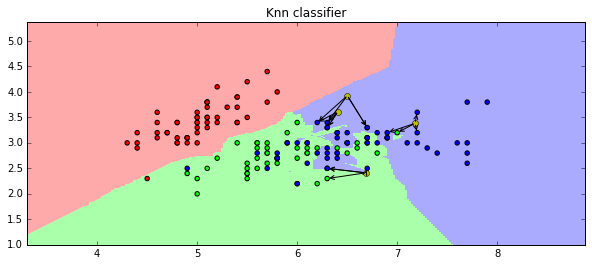

In [27]:
from sklearn.neighbors import NearestNeighbors
import random


n_neighbors = 4

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, Y)


plot = plots.show_classifier(clf,X,Y, 'Knn classifier')


for _ in range(0,4):
    rnd1 = random.uniform(min(X[[0]].values),max(X[[0]].values))[0]
    rnd2 = random.uniform(min(X[[1]].values),max(X[[1]].values))[0]

    plot.plot(rnd1, rnd2,'yo')
    ax = plot.axes()

    # rs = clf.kneighbors(=clf.kneighbors, algorithm='ball_tree').fit(X)
    distances, indices = clf.kneighbors([[rnd1,rnd2]])
    for closest in X.iloc[indices[0]].as_matrix():
        a,b = closest[0],closest[1]
        ax.annotate("", xy=(a, b), xytext=(rnd1, rnd2), arrowprops=dict(arrowstyle="->"))




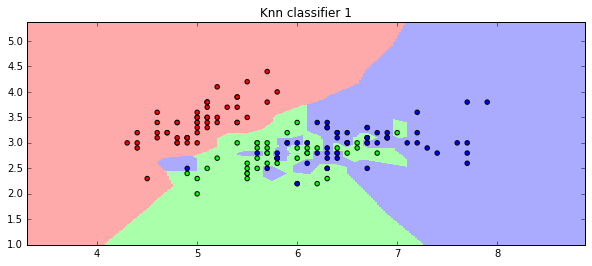

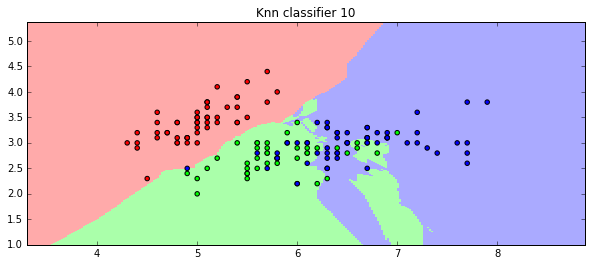

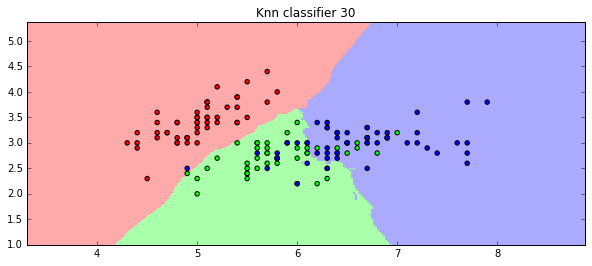

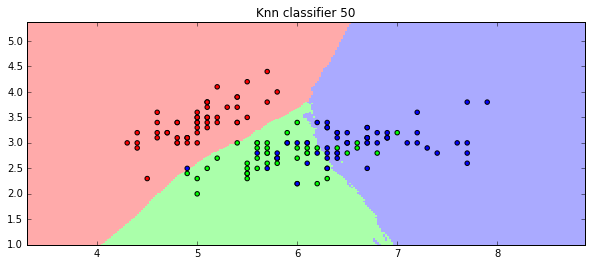

In [28]:
for n in [1,10,30,50]:
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    clf.fit(X, Y)

    plot = plots.show_classifier(clf,X,Y, 'Knn classifier %i'% n)


## Acierto vs. nº vecinos

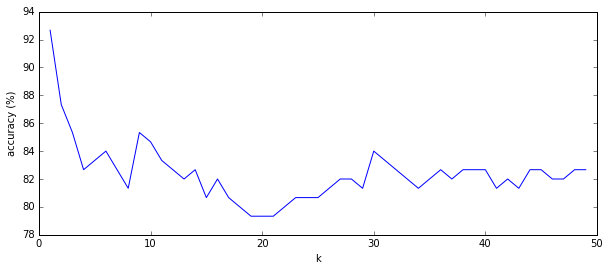

In [29]:

accs = []
for n in range(1,50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    clf.fit(X, Y)
    acc =  sum(clf.predict (X) == Y) / len(Y) * 100
    accs.append(acc)
plt.xlabel ('k')
plt.ylabel ('accuracy (%)')
plt.plot(range(1,50),accs)

### si tenemos en cuenta los cuatro atributos....

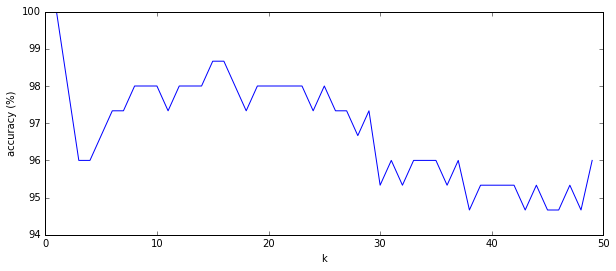

In [30]:
X, Y = iris[['sepal_length','sepal_width','petal_length','petal_width']], iris.target

accs = []
for n in range(1,50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    clf.fit(X, Y)
    acc =  sum(clf.predict (X) == Y) / len(Y) * 100
    accs.append(acc)
plt.xlabel ('k')
plt.ylabel ('accuracy (%)')
plt.plot(range(1,50),accs)

### en el mejor de los casos obtenemos un 100% de aciertos!

In [31]:
X, Y = iris[['sepal_length','sepal_width','petal_length','petal_width']], iris.target

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X, Y)
acc =  sum(clf.predict (X) == Y) / len(Y) * 100
acc

100.0

## Nunca pruebes un modelo con los mismos datos que usaste para entrenarlo

In [39]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.4)
X_train.shape, X_test.shape

((90, 4), (60, 4))

In [40]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, Y_train)

acc =  sum(clf.predict (X_test) == Y_test) / len(Y_test) * 100
acc

95.0

### Dependiendo de la división la tasa de aciertos varía

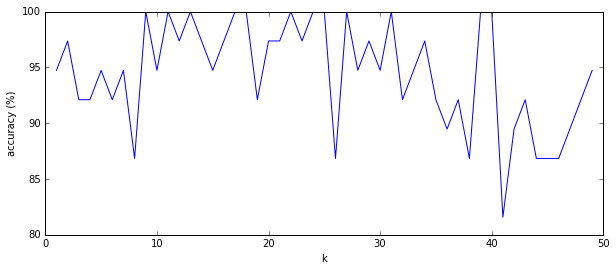

In [43]:
accs = []
for n in range(1,50):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, Y_train)
    acc =  sum(clf.predict (X_test) == Y_test) / len(Y_test) * 100
    accs.append(acc)
    
plt.xlabel ('k')
plt.ylabel ('accuracy (%)')
plt.plot(range(1,50),accs)


### Solución: hacer varias divisiones y calular la media de la tasa de aciertos

In [44]:
X1, X2, Y1, Y2 = train_test_split(X, Y, test_size=0.5)
X1.shape, X2.shape

((75, 4), (75, 4))

In [45]:

print(neighbors.KNeighborsClassifier(1).fit(X2, Y2).score(X1, Y1))
print(neighbors.KNeighborsClassifier(1).fit(X1, Y1).score(X2, Y2))


0.946666666667
0.96


In [14]:
from sklearn.cross_validation import cross_val_score
cv = cross_val_score(neighbors.KNeighborsClassifier(1), X, Y, cv=20)
cv.mean(), cv

(0.96111111111111103,
 array([ 1.        ,  1.        ,  0.88888889,  1.        ,  1.        ,
         1.        ,  0.77777778,  0.88888889,  1.        ,  1.        ,
         1.        ,  0.66666667,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ]))

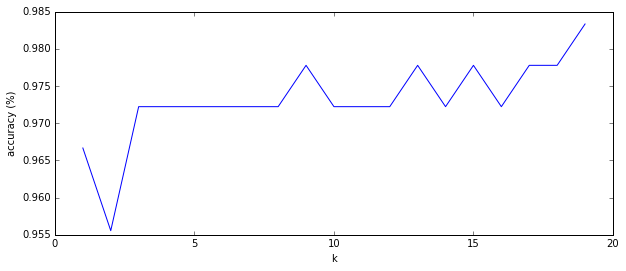

In [46]:
accs = []
for n in range(1,20):
    cv = cross_val_score(neighbors.KNeighborsClassifier(n), X, Y, cv=30)
    
    acc = cv.mean()
    accs.append(acc)
    
plt.xlabel ('k')
plt.ylabel ('accuracy (%)')
plt.plot(range(1,20),accs)